In [286]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv
/kaggle/input/disease/heart.csv


In [287]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

In [288]:
dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

# Mean,Median and Mode

In [289]:
# Calculate Mean
mean_values = dataset.mean()
print("Mean of each column in the dataset:")
print(mean_values)

#************************************************

# Calculate Median
median_values = dataset.median()
print("Median of each column in the dataset:")
print(median_values)


#************************************************
# Calculate Mode
mode_values =dataset.mode().iloc[0]  # Using iloc[0] to get the first mode if there are multiple modes
print("Mode of each column in the dataset:")
print(mode_values)

Mean of each column in the dataset:
age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64
Median of each column in the dataset:
age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64
Mode of each column in the dataset:
age          58.0
sex           1.0
cp            0.0
trestbps    120.0
chol        204.0
fbs           0.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 0, dtype: float64


In [290]:

dataset = dataset.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [291]:
dataset['sex'][dataset['sex'] == 0] = 'female'
dataset['sex'][dataset['sex'] == 1] = 'male'

dataset['chest_pain_type'][dataset['chest_pain_type'] == 0] = 'typical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 1] = 'atypical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 2] = 'non-anginal pain'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 3] = 'asymptomatic'

dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dataset['resting_electrocardiogram'][dataset['resting_electrocardiogram'] == 0] = 'normal'
dataset['resting_electrocardiogram'][dataset['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
dataset['resting_electrocardiogram'][dataset['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

dataset['exercise_induced_angina'][dataset['exercise_induced_angina'] == 0] = 'no'
dataset['exercise_induced_angina'][dataset['exercise_induced_angina'] == 1] = 'yes'

dataset['st_slope'][dataset['st_slope'] == 0] = 'upsloping'
dataset['st_slope'][dataset['st_slope'] == 1] = 'flat'
dataset['st_slope'][dataset['st_slope'] == 2] = 'downsloping'

dataset['thalassemia'][dataset['thalassemia'] == 1] = 'fixed defect'
dataset['thalassemia'][dataset['thalassemia'] == 2] = 'normal'
dataset['thalassemia'][dataset['thalassemia'] == 3] = 'reversable defect'

/tmp/ipykernel_33/2263160951.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['sex'][dataset['sex'] == 0] = 'female'
/tmp/ipykernel_33/2263160951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [293]:
#To see the first five rows of the dataset we can use dataset.head()
dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,male,typical angina,125,212,lower than 120mg/ml,ST-T wave abnormality,168,no,1.0,downsloping,2,reversable defect,0
1,53,male,typical angina,140,203,greater than 120mg/ml,normal,155,yes,3.1,upsloping,0,reversable defect,0
2,70,male,typical angina,145,174,lower than 120mg/ml,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversable defect,0
3,61,male,typical angina,148,203,lower than 120mg/ml,ST-T wave abnormality,161,no,0.0,downsloping,1,reversable defect,0
4,62,female,typical angina,138,294,greater than 120mg/ml,ST-T wave abnormality,106,no,1.9,flat,3,normal,0


In [294]:
dataset.replace(['NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?'], 'other', inplace=True)

In [295]:
dataset


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,male,typical angina,125,212,lower than 120mg/ml,ST-T wave abnormality,168,no,1.0,downsloping,2,reversable defect,0
1,53,male,typical angina,140,203,greater than 120mg/ml,normal,155,yes,3.1,upsloping,0,reversable defect,0
2,70,male,typical angina,145,174,lower than 120mg/ml,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversable defect,0
3,61,male,typical angina,148,203,lower than 120mg/ml,ST-T wave abnormality,161,no,0.0,downsloping,1,reversable defect,0
4,62,female,typical angina,138,294,greater than 120mg/ml,ST-T wave abnormality,106,no,1.9,flat,3,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,atypical angina,140,221,lower than 120mg/ml,ST-T wave abnormality,164,yes,0.0,downsloping,0,normal,1
1021,60,male,typical angina,125,258,lower than 120mg/ml,normal,141,yes,2.8,flat,1,reversable defect,0
1022,47,male,typical angina,110,275,lower than 120mg/ml,normal,118,yes,1.0,flat,1,normal,0
1023,50,female,typical angina,110,254,lower than 120mg/ml,normal,159,no,0.0,downsloping,0,normal,1


In [296]:
dataset.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [297]:
dataset.isnull().sum().sum()

0

In [298]:
dataset['sex'].unique()

array(['male', 'female'], dtype=object)

In [299]:
# To see if there is any null values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        1025 non-null   int64  
 1   sex                        1025 non-null   object 
 2   chest_pain_type            1025 non-null   object 
 3   resting_blood_pressure     1025 non-null   int64  
 4   cholesterol                1025 non-null   int64  
 5   fasting_blood_sugar        1025 non-null   object 
 6   resting_electrocardiogram  1025 non-null   object 
 7   max_heart_rate_achieved    1025 non-null   int64  
 8   exercise_induced_angina    1025 non-null   object 
 9   st_depression              1025 non-null   float64
 10  st_slope                   1025 non-null   object 
 11  num_major_vessels          1025 non-null   int64  
 12  thalassemia                1025 non-null   object 
 13  target                     1025 non-null   int64

In [300]:
#To find number of rows and column
dataset.shape

(1025, 14)

In [301]:
dataset.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000,1.000000


In [302]:
numerical_vars = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = dataset.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']
Categorical variables: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 'exercise_induced_angina', 'st_slope', 'thalassemia']


In [303]:
categorical_count = dataset.select_dtypes(include='object').shape[1]
numerical_count = dataset.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 7
Number of numerical variables: 7


In [304]:
missing_df =  dataset.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( dataset))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
age,0,0.0
sex,0,0.0
chest_pain_type,0,0.0
resting_blood_pressure,0,0.0
cholesterol,0,0.0
fasting_blood_sugar,0,0.0
resting_electrocardiogram,0,0.0
max_heart_rate_achieved,0,0.0
exercise_induced_angina,0,0.0
st_depression,0,0.0


# Handling Missing values 

In [305]:
# Handling missing values
# Imputing missing values with the mean for continuous variables and mode for categorical variables
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)
    else:
        dataset[col].fillna(dataset[col].mean(), inplace=True)

# Checking for missing values before imputation
missing_values = dataset.isnull().sum()

# Rechecking for missing values after imputation
missing_values_after = dataset.isnull().sum()

(missing_values, missing_values_after)

/tmp/ipykernel_33/521218851.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)
/tmp/ipykernel_33/521218851.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

(age                          0
 sex                          0
 chest_pain_type              0
 resting_blood_pressure       0
 cholesterol                  0
 fasting_blood_sugar          0
 resting_electrocardiogram    0
 max_heart_rate_achieved      0
 exercise_induced_angina      0
 st_depression                0
 st_slope                     0
 num_major_vessels            0
 thalassemia                  0
 target                       0
 dtype: int64,
 age                          0
 sex                          0
 chest_pain_type              0
 resting_blood_pressure       0
 cholesterol                  0
 fasting_blood_sugar          0
 resting_electrocardiogram    0
 max_heart_rate_achieved      0
 exercise_induced_angina      0
 st_depression                0
 st_slope                     0
 num_major_vessels            0
 thalassemia                  0
 target                       0
 dtype: int64)

In [306]:
dataset[dataset.duplicated(keep=False)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,male,typical angina,125,212,lower than 120mg/ml,ST-T wave abnormality,168,no,1.0,downsloping,2,reversable defect,0
1,53,male,typical angina,140,203,greater than 120mg/ml,normal,155,yes,3.1,upsloping,0,reversable defect,0
2,70,male,typical angina,145,174,lower than 120mg/ml,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversable defect,0
3,61,male,typical angina,148,203,lower than 120mg/ml,ST-T wave abnormality,161,no,0.0,downsloping,1,reversable defect,0
4,62,female,typical angina,138,294,greater than 120mg/ml,ST-T wave abnormality,106,no,1.9,flat,3,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,atypical angina,140,221,lower than 120mg/ml,ST-T wave abnormality,164,yes,0.0,downsloping,0,normal,1
1021,60,male,typical angina,125,258,lower than 120mg/ml,normal,141,yes,2.8,flat,1,reversable defect,0
1022,47,male,typical angina,110,275,lower than 120mg/ml,normal,118,yes,1.0,flat,1,normal,0
1023,50,female,typical angina,110,254,lower than 120mg/ml,normal,159,no,0.0,downsloping,0,normal,1


In [307]:
dataset.duplicated().sum()

723

In [308]:
# Drop duplicate rows from the DataFrame
dataset.drop_duplicates(inplace=True)

In [309]:
dataset.shape

(302, 14)

In [310]:
# Inspect useless features
dataset.nunique().sort_values()

sex                            2
fasting_blood_sugar            2
exercise_induced_angina        2
target                         2
resting_electrocardiogram      3
st_slope                       3
chest_pain_type                4
thalassemia                    4
num_major_vessels              5
st_depression                 40
age                           41
resting_blood_pressure        49
max_heart_rate_achieved       91
cholesterol                  152
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sex', ylabel='Count'>

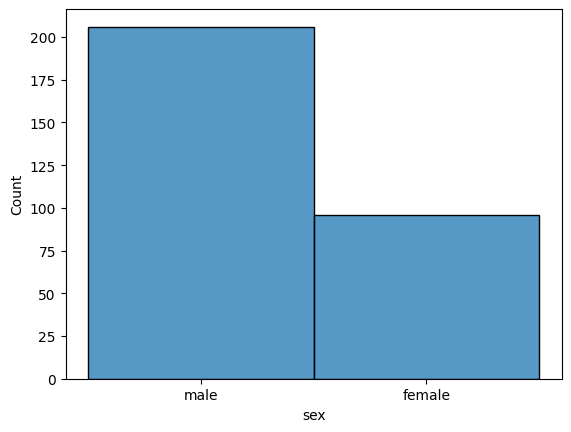

In [311]:
sns.histplot(dataset['sex'])

**Grouping**



In [312]:
dataset.groupby('age')['sex'].sum()

age
29                                                 male
34                                           femalemale
35                                   malefemalemalemale
37                                           femalemale
38                                             malemale
39                                 malefemalefemalemale
40                                         malemalemale
41     malemalemalemalemalefemalefemalefemalefemalemale
42                 femalemalemalemalemalemalemalefemale
43                 femalefemalemalemalemalemalemalemale
44     malemalemalemalefemalemalemalemalemalemalefemale
45               malefemalefemalemalemalefemalemalemale
46                   malemalemalefemalefemalefemalemale
47                                 malemalemalemalemale
48                       malemalemalemalemalefemalemale
49                             malemalemalefemalefemale
50                   femalemalemalemalemalefemalefemale
51    malefemalemalemalefemalefemalemalemale

In [313]:
dataset.groupby('sex').count()
# 1=male,0=female

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
sex,,,,,,,,,,,,,
female,96,96,96,96,96,96,96,96,96,96,96,96,96
male,206,206,206,206,206,206,206,206,206,206,206,206,206


<Axes: title={'center': 'Age Probability'}, xlabel='sex'>

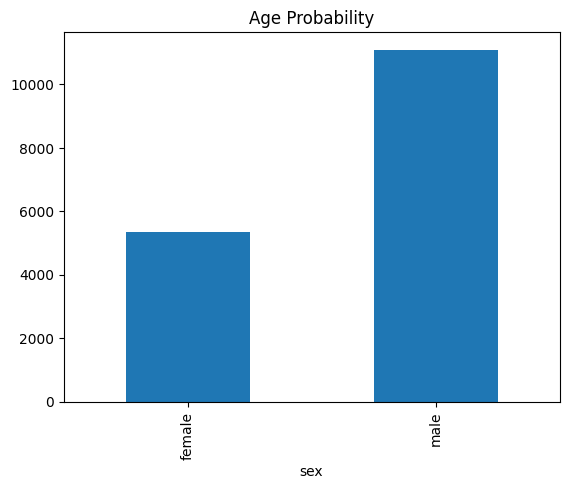

In [314]:
dataset.groupby('sex')['age'].sum().plot(kind='bar',title="Age Probability")

<Axes: ylabel='Frequency'>

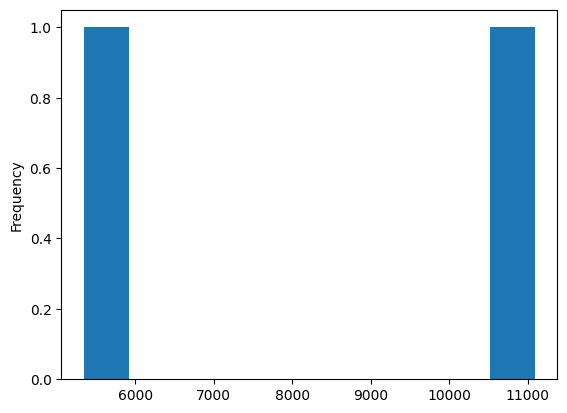

In [315]:
dataset.groupby('sex')['age'].sum().plot(kind='hist')

In [316]:
dataset.groupby('sex')['chest_pain_type'].count()

sex
female     96
male      206
Name: chest_pain_type, dtype: int64

<Axes: title={'center': 'Chest Pain probability'}, xlabel='sex'>

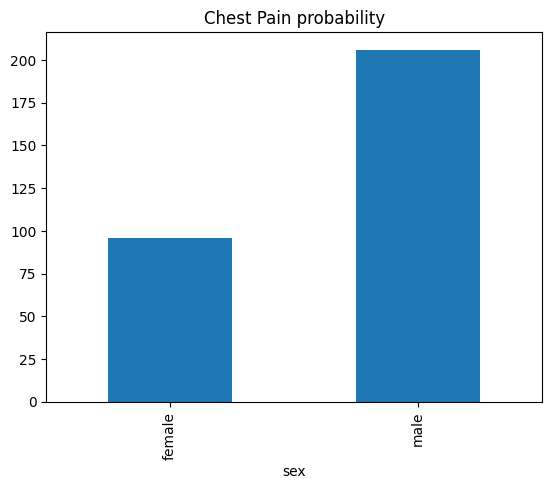

In [317]:
dataset.groupby('sex')['chest_pain_type'].count().plot(kind='bar',title="Chest Pain probability")

<Axes: >

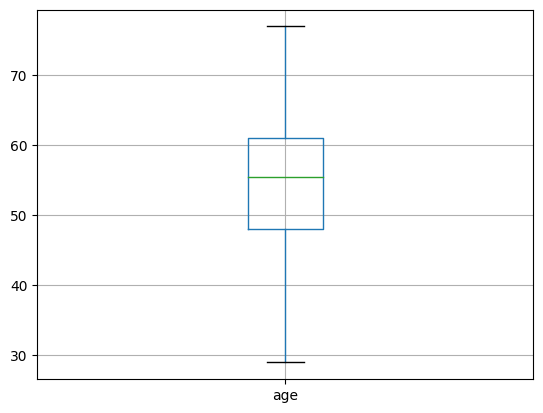

In [318]:
dataset.boxplot(column='age')

<Axes: >

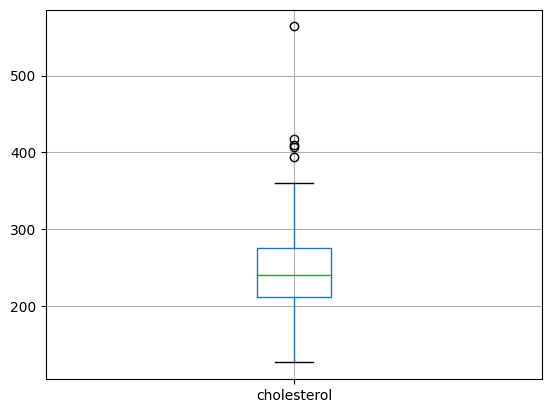

In [319]:
dataset.boxplot(column='cholesterol')

<Axes: >

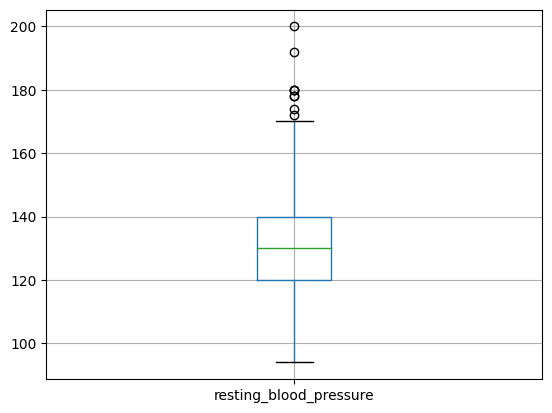

In [320]:
dataset.boxplot(column='resting_blood_pressure')

<Axes: >

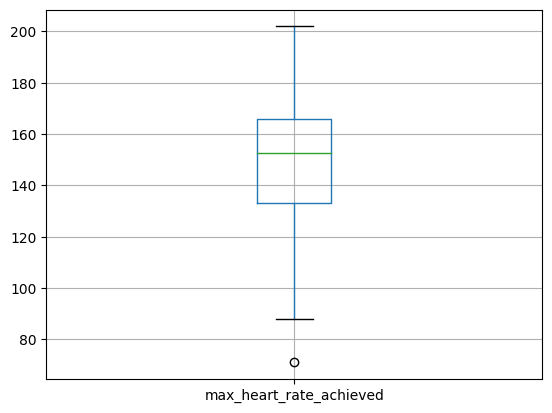

In [321]:
dataset.boxplot(column='max_heart_rate_achieved')

<Axes: >

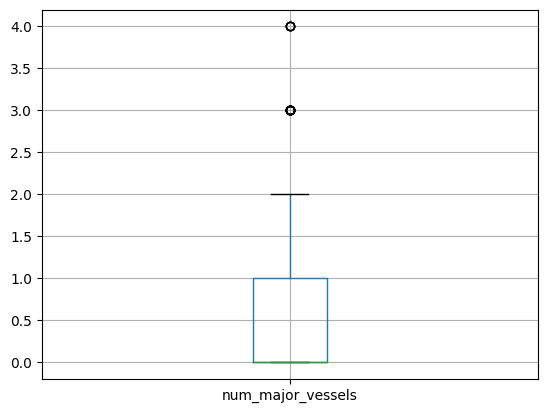

In [322]:
dataset.boxplot(column='num_major_vessels')

<Axes: >

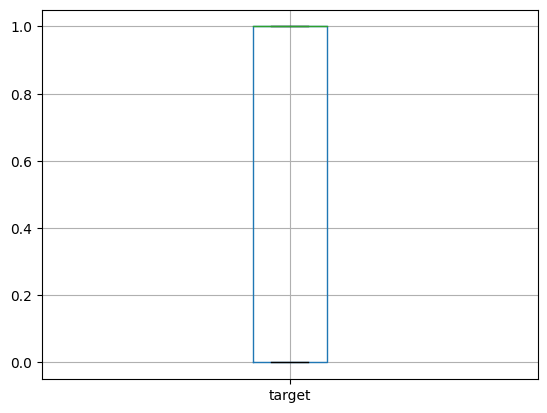

In [323]:
dataset.boxplot(column='target')

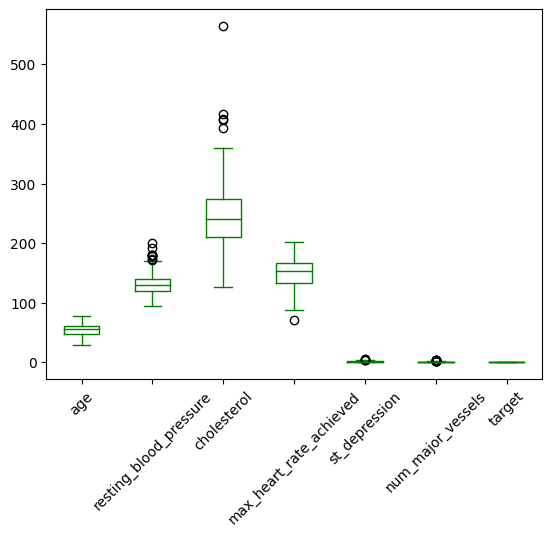

In [324]:
# Plot the boxplot with rotated text labels
dataset.plot(kind='box', rot=45,color='green')

# Show the plot
plt.show()

# Splitting Dataset to training and test data 

In [325]:
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as preprocessing
# dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
le=preprocessing.LabelEncoder()
dataset['sex'] = dataset['sex'].astype(str)
dataset['sex']=le.fit_transform(dataset['sex'])
dataset['chest_pain_type'] = dataset['chest_pain_type'].astype(str)
dataset['chest_pain_type']=le.fit_transform(dataset['chest_pain_type'])
dataset['fasting_blood_sugar'] = dataset['fasting_blood_sugar'].astype(str)
dataset['fasting_blood_sugar']=le.fit_transform(dataset['fasting_blood_sugar'])
dataset['resting_electrocardiogram'] = dataset['resting_electrocardiogram'].astype(str)
dataset['resting_electrocardiogram']=le.fit_transform(dataset['resting_electrocardiogram'])
dataset['exercise_induced_angina'] = dataset['exercise_induced_angina'].astype(str)

dataset['exercise_induced_angina']=le.fit_transform(dataset['exercise_induced_angina'])

dataset['st_slope'] = dataset['st_slope'].astype(str)
dataset['st_slope']=le.fit_transform(dataset['st_slope'])
dataset['thalassemia'] = dataset['thalassemia'].astype(str)
dataset['thalassemia']=le.fit_transform(dataset['thalassemia'])


In [326]:
x = dataset.drop('target',axis=1)
y = dataset['target']

In [327]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,shuffle = True,random_state=42)

In [328]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (256, 13) (256,)
Testing set shape: (46, 13) (46,)


#  Creation of Decision Tree using Gini Index

[Text(0.5, 0.875, 'x[2] <= 2.5\ngini = 0.493\nsamples = 241\nvalue = [106, 135]'),
 Text(0.25, 0.625, 'x[9] <= 1.95\ngini = 0.316\nsamples = 132\nvalue = [26, 106]'),
 Text(0.125, 0.375, 'x[0] <= 55.5\ngini = 0.253\nsamples = 121\nvalue = [18, 103]'),
 Text(0.0625, 0.125, 'gini = 0.08\nsamples = 72\nvalue = [3, 69]'),
 Text(0.1875, 0.125, 'gini = 0.425\nsamples = 49\nvalue = [15, 34]'),
 Text(0.375, 0.375, 'x[11] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.625, 'x[9] <= 0.7\ngini = 0.391\nsamples = 109\nvalue = [80, 29]'),
 Text(0.625, 0.375, 'x[11] <= 0.5\ngini = 0.498\nsamples = 43\nvalue = [20, 23]'),
 Text(0.5625, 0.125, 'gini = 0.393\nsamples = 26\nvalue = [7, 19]'),
 Text(0.6875, 0.125, 'gini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.875, 0.375, 'x[3] <= 116.5\ngini = 0.165\nsamples = 66\nvalue = [60, 6]'),
 Text(0.8125,

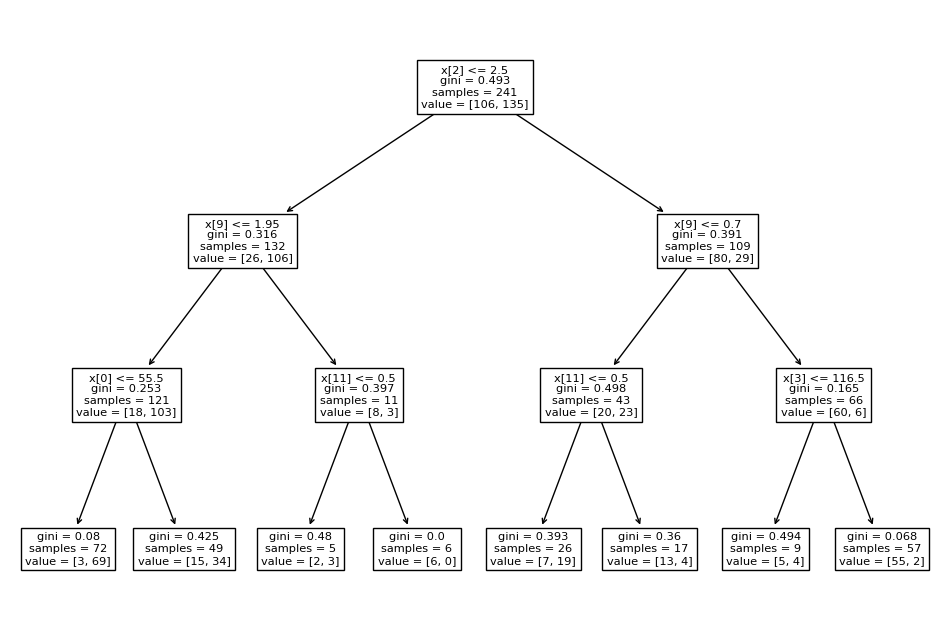

In [405]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(x_train, y_train)
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [406]:
y_pred_gini = clf_gini.predict(x_test)

y_pred_gini


array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [407]:
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [410]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))


# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Model accuracy score with criterion gini index: 0.7869
Training-set accuracy score: 0.8465
Precision: 0.6857142857142857
Recall: 0.8275862068965517
F1-score: 0.75


# Discision Tree Using Entropy

In [392]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into features and target variable
x = dataset.drop('target', axis=1)
y = dataset['target']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Accuracy: 0.7377049180327869
Precision: 0.6857142857142857
Recall: 0.8275862068965517
F1-score: 0.75


# Confusion matrix

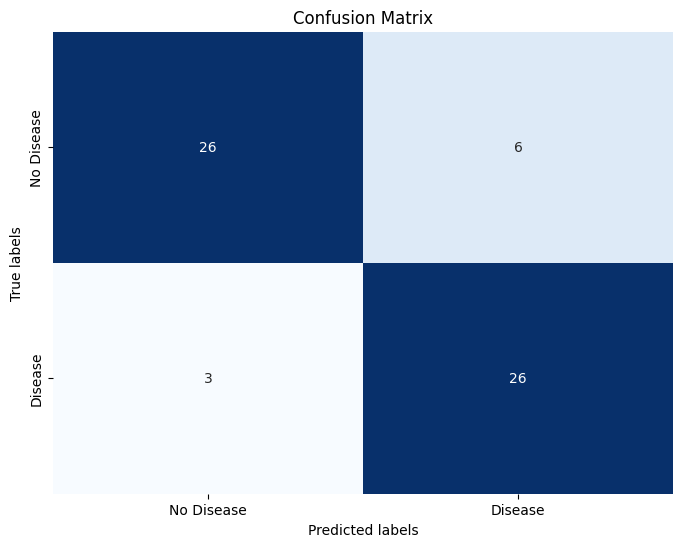

In [336]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's saved as a CSV file)


# Preprocess the data if necessary (e.g., handle missing values, encode categorical variables)

# Split the dataset into features and target variable
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (Random Forest classifier in this example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [337]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8524590163934426
Precision: 0.8125
Recall: 0.896551724137931
F1-score: 0.8524590163934426


# Naive bayes

In [411]:


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = GaussianNB()

# Train the model
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Accuracy: 0.8032786885245902
Confusion Matrix:
[[26  6]
 [ 6 23]]
Accuracy: 0.8032786885245902
Precision: 0.7931034482758621
Recall: 0.7931034482758621
F1-score: 0.7931034482758621


# Correlation 

In [369]:
print(dataset.head())  # Displays the first few rows of the dataframe
print(dataset.info())

   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    1                3                     125          212   
1   53    1                3                     140          203   
2   70    1                3                     145          174   
3   61    1                3                     148          203   
4   62    0                3                     138          294   

   fasting_blood_sugar  resting_electrocardiogram  max_heart_rate_achieved  \
0                    1                          0                      168   
1                    0                          2                      155   
2                    1                          0                      125   
3                    1                          0                      161   
4                    0                          0                      106   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            1.0 

In [370]:
correlation_matrix = dataset.corr()
print(correlation_matrix)

                                age       sex  chest_pain_type  \
age                        1.000000 -0.094962         0.102543   
sex                       -0.094962  1.000000         0.014390   
chest_pain_type            0.102543  0.014390         1.000000   
resting_blood_pressure     0.283121 -0.057647        -0.040633   
cholesterol                0.207216 -0.195571         0.069274   
fasting_blood_sugar       -0.119492 -0.046022         0.038822   
resting_electrocardiogram  0.147137  0.026693         0.064743   
max_heart_rate_achieved   -0.395235 -0.046439        -0.336440   
exercise_induced_angina    0.093216  0.143460         0.386889   
st_depression              0.206040  0.098322         0.205420   
st_slope                   0.164124  0.032990         0.155332   
num_major_vessels          0.302261  0.113060         0.210365   
thalassemia                0.065317  0.211452         0.170486   
target                    -0.221476 -0.283609        -0.412621   
Cluster   

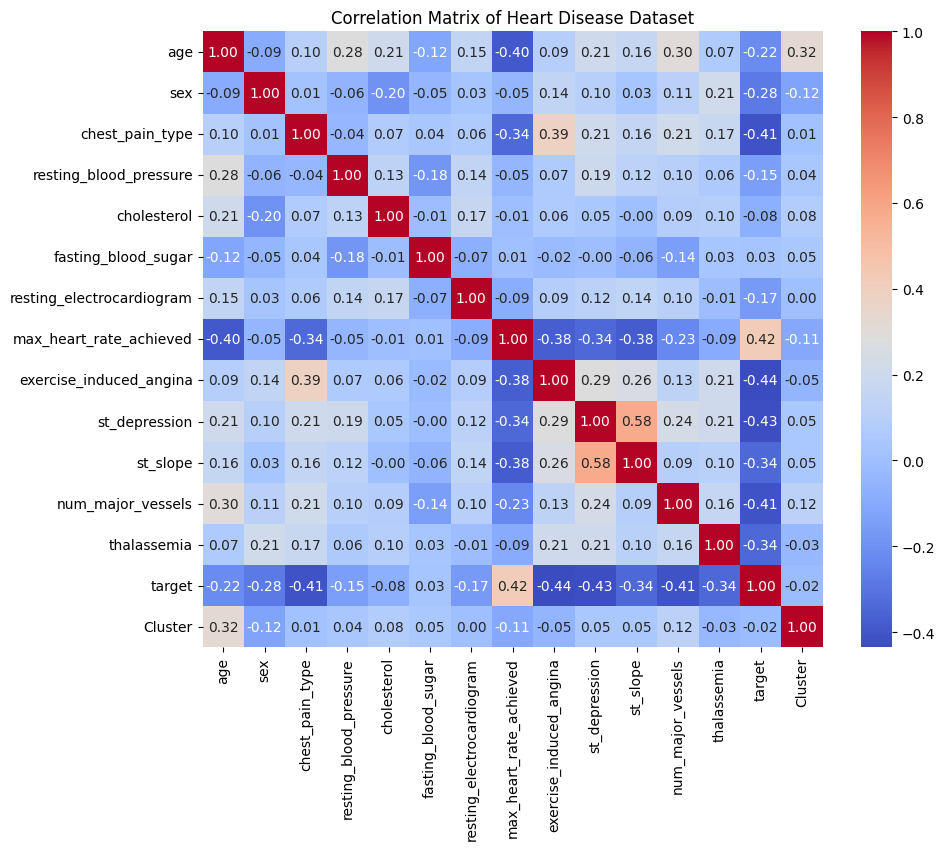

In [371]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

In [372]:
# Assuming 'target' is the column indicating the presence of heart disease
print(correlation_matrix['target'].sort_values(ascending=False))

target                       1.000000
max_heart_rate_achieved      0.419955
fasting_blood_sugar          0.026826
Cluster                     -0.016541
cholesterol                 -0.081437
resting_blood_pressure      -0.146269
resting_electrocardiogram   -0.166154
age                         -0.221476
sex                         -0.283609
thalassemia                 -0.343101
st_slope                    -0.343940
num_major_vessels           -0.408992
chest_pain_type             -0.412621
st_depression               -0.429146
exercise_induced_angina     -0.435601
Name: target, dtype: float64


In [414]:

threshold = 0.5

# Count the number of correlations exceeding the threshold
strong_correlations = (abs(correlation_matrix) > threshold).sum().sum() - len(correlation_matrix)  # Exclude self-correlations
total_possible_correlations = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Exclude self-correlations and duplicates

# Calculate true positives (TP)
# True positives are the number of strong correlations
TP = strong_correlations

# Calculate false positives (FP)
# False positives are the number of correlations above the threshold that are not strong correlations
FP = (abs(correlation_matrix) > threshold).sum().sum() - TP

# Calculate false negatives (FN)
# False negatives are the number of correlations below the threshold that are actually strong correlations
FN = total_possible_correlations - TP

# Calculate accuracy
accuracy = TP / total_possible_correlations

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Accuracy: 0.01904761904761905
Precision: 0.11764705882352941
Recall: 0.01904761904761905
F1-score: 0.03278688524590164


# KNN

Accuracy: 0.7704918032786885
Precision: 0.7272727272727273
Recall: 0.8275862068965517
F1-score: 0.7741935483870968


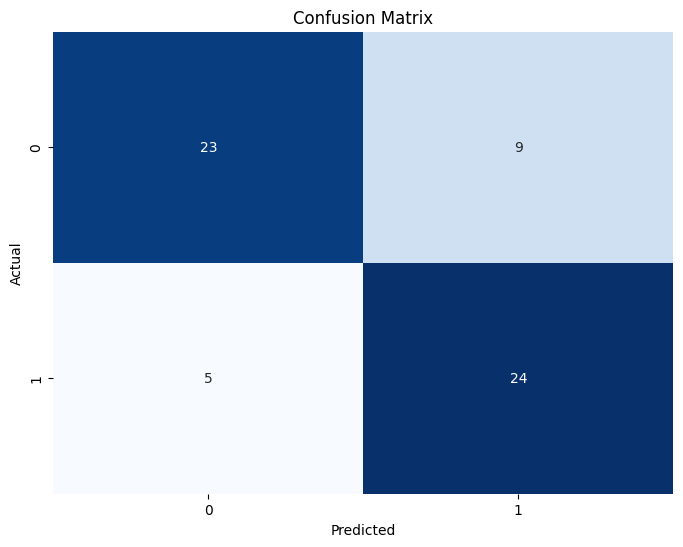

In [416]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x_train, x_test, y_train, and y_test are already defined

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of 'n_neighbors'

# Train the classifier
knn.fit(x_train, y_train)

# Predicting the test set results
y_pred = knn.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# K-Means

In [417]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Select relevant features for clustering
X = dataset[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']]
# age	sex	chest_pain_type	resting_blood_pressure	cholesterol	fasting_blood_sugar	resting_electrocardiogram	max_heart_rate_achieved	exercise_induced_angina	st_depression	st_slope	num_major_vessels	thalassemia

# Initialize KMeans with desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
dataset['Cluster'] = cluster_labels

# Display the updated dataframe with cluster labels
print(dataset.head())

silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)




   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    1                3                     125          212   
1   53    1                3                     140          203   
2   70    1                3                     145          174   
3   61    1                3                     148          203   
4   62    0                3                     138          294   

   fasting_blood_sugar  resting_electrocardiogram  max_heart_rate_achieved  \
0                    1                          0                      168   
1                    0                          2                      155   
2                    1                          0                      125   
3                    1                          0                      161   
4                    0                          0                      106   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            1.0 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


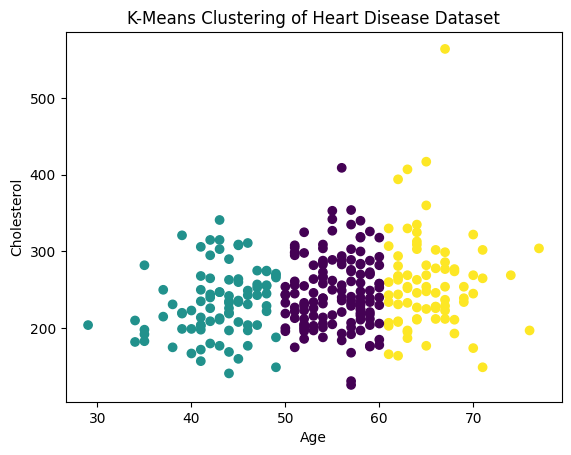

In [418]:


# Select relevant features for clustering
X = dataset[['age']]

# Initialize KMeans with desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
dataset['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(dataset['age'], dataset['cholesterol'], c=cluster_labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('K-Means Clustering of Heart Disease Dataset')
plt.show()